
# Project: Investigate a Dataset - [tmdb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>'popularity': this tells how popular a particluar movie is 

>'budget' : this tells the budget of a movie when it was produced

>'revenue' : this revenue the budget of a movie when it was produced

>'cast' : the list the casts who are present in the movies

>'director' : this is the director who(s) directed the movie

>'tagline' : this are short text which serves to clarify an idea for, or is designed with a form of, dramatic effect

>'keywords' : this is a word (or group of connected words) attached to a the movie to describe any notable object, concept, style or action that takes place during a title

>'overview' : a brief summary of a completed screenplay's core concept, major plot points, and main character arcs

>'runtime' : its the duration of the movie, the amount of time the movie takes to show

>'genres' : its the genre(s) a particular mpvie belongs to

>'production_companies' : this is the company(s) involved with the production of the movie

>'release_date' : this is the date a movie is released

>'vote_count' : amount of vote a particlar movie gathered

>'vote_average' : the vote_average of a movie

>'release_year' : this is the year a particular movie is released

>'budget_adj' : this is the adjusted budget of the movie show the budget of the movie in terms of 2010 dollars, 
accounting for inflation over time

>'revenue_adj' :  this is the adjusted revenue of the movie show the revenue of the movie in terms of 2010 dollars, accounting for inflation over time

### Question(s) for Analysis
>Which genres are most popular and with high rating?<br>
>Movies rating over the years?<br>
> Budget and Revenue of movies across the years <br>
>Year with the highest production of movie?<br>
> Director with highest rating?<br>
>Which genre has the highest number of movies<br>
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**
> the wrangle function is use to load the data set and perform some preprocessing

### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(columns = ['imdb_id', 'homepage','tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

> The columns imdb_id, homepage, tagline, keywords, overview were dropped because the summ of there null values was much and they are not necessarily needed for the process

In [8]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#dropping the columns with null values
df.dropna(how = 'any',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
 14  budget_adj            9773 non-null   float64
 15  revenue_adj         

In [10]:
# Convert 'release_date' type from object datatype to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [11]:
df.shape

(9773, 16)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9.773000e+03,9.773000e+03,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,63187.492479,0.694711,1.618108e+07,4.422678e+07,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,90713.666750,1.036879,3.220939e+07,1.225834e+08,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10222.000000,0.232756,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18681.000000,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,70577.000000,0.776380,1.940000e+07,3.104204e+07,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


> many movies shows revenue and budget to be zero or less than 1000 which is not ideal, to be able to get what influence revenue, the columns with less than 1000 as budget and revenue will be dropped

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 1 (Which genres are most popular and with high rating?)

In [14]:
#Splitting the genres value
df =df.assign(genres=df.genres.str.split('|')).explode('genres')

In [15]:
popular_genres = df.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])

In [16]:
popular_genres

,genres,popularity
9,Foreign,0.209384
5,Documentary,0.217167
16,TV Movie,0.295864
11,Horror,0.480207
12,Music,0.550884
19,Western,0.604554
10,History,0.609500
6,Drama,0.625872
14,Romance,0.627178
3,Comedy,0.631565


Text(0.5, 1.0, 'Popular Genres')

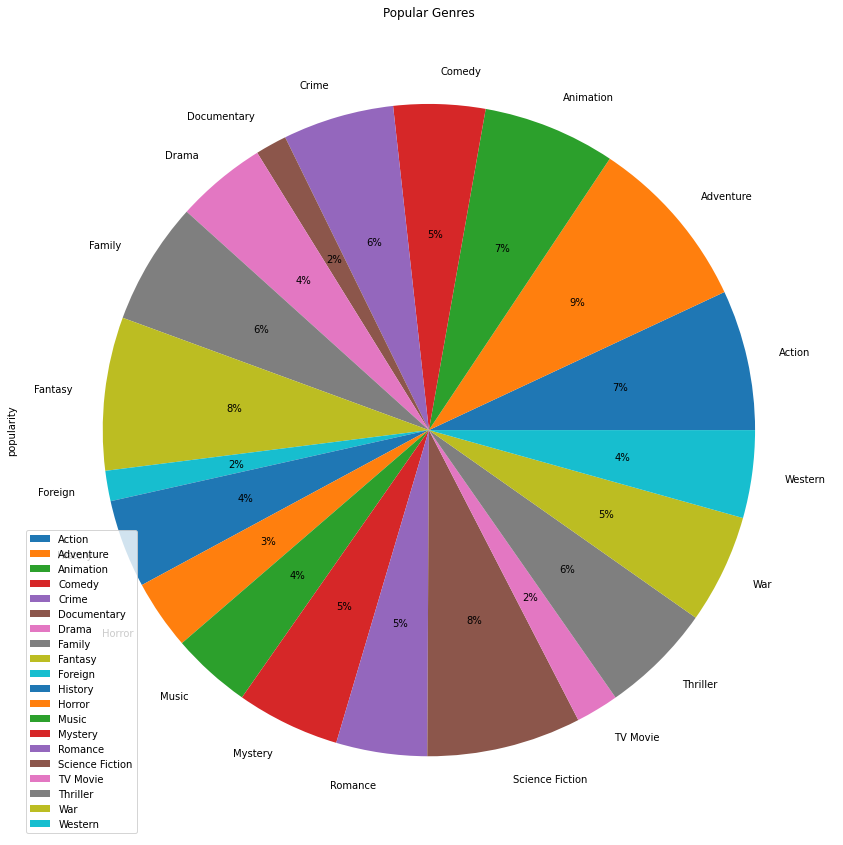

In [17]:
popular_genres.groupby(['genres']).sum().plot(
    kind='pie',subplots=True,figsize=(15,15), autopct='%1.0f%%')
# the title of the plot
plt.title('Popular Genres')

> From the pie chart only Adventure has 9% which happens to be the highest percentage, Hence Adventure is the popular genre from the dataset

In [18]:

genres_rate = df.groupby('genres').mean().vote_average


In [19]:
sort_gen = genres_rate.sort_values(ascending=False)
sort_gen

genres
Documentary        6.930915
History            6.416993
Music              6.413274
Animation          6.387358
War                6.309302
Drama              6.178121
Crime              6.127769
Western            6.094375
Romance            6.044586
Family             6.002557
Mystery            5.960414
Adventure          5.951951
Foreign            5.934167
Comedy             5.894553
Fantasy            5.884524
Action             5.796467
Thriller           5.766727
TV Movie           5.690152
Science Fiction    5.670449
Horror             5.365793
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'graph for count of average vote for all movie')

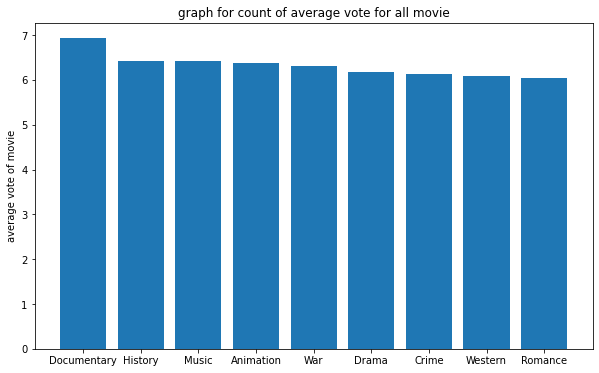

In [20]:
plt.subplots(figsize=(10,6))
plt.bar(sort_gen.index[:9],sort_gen[:9])
plt.ylabel('genre')
plt.ylabel('average vote of movie')
plt.title('graph for count of average vote for all movie')

> The barplot show that Documentary has the highest vote

### Research Question 2(Movies rating over the years )

In [21]:
df.groupby(['vote_count']).mean()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
vote_count,,,,,,,,,
10,63088.675520,0.228333,1.857667e+06,1.162105e+06,101.174365,5.444457,1996.403002,3.275505e+06,2.685736e+06
11,76303.156471,0.216743,1.533887e+06,1.474299e+06,95.343529,5.557765,1999.142353,2.066745e+06,2.949110e+06
12,65609.054870,0.222041,2.121558e+06,7.179579e+05,97.607682,5.465844,1996.618656,2.538945e+06,1.643694e+06
13,62982.808307,0.195730,9.215854e+05,1.829773e+06,100.175719,5.701757,1996.504792,1.916130e+06,5.135808e+06
14,68366.611012,0.233191,2.009569e+06,2.398834e+06,98.779751,5.687922,1996.388988,3.187876e+06,6.017023e+06
...,...,...,...,...,...,...,...,...,...
7375,68718.000000,5.944518,1.000000e+08,4.253682e+08,165.000000,7.700000,2012.000000,9.497443e+07,4.039911e+08
8432,155.000000,8.466668,1.850000e+08,1.001922e+09,152.000000,8.100000,2008.000000,1.873655e+08,1.014733e+09
8458,19995.000000,9.432768,2.370000e+08,2.781506e+09,162.000000,7.100000,2009.000000,2.408869e+08,2.827124e+09


In [22]:
df.vote_average.describe()

count    24655.000000
mean         5.954159
std          0.896162
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          8.700000
Name: vote_average, dtype: float64

In [23]:
df.vote_average.nunique()

68

Text(0, 0.5, 'Vote')

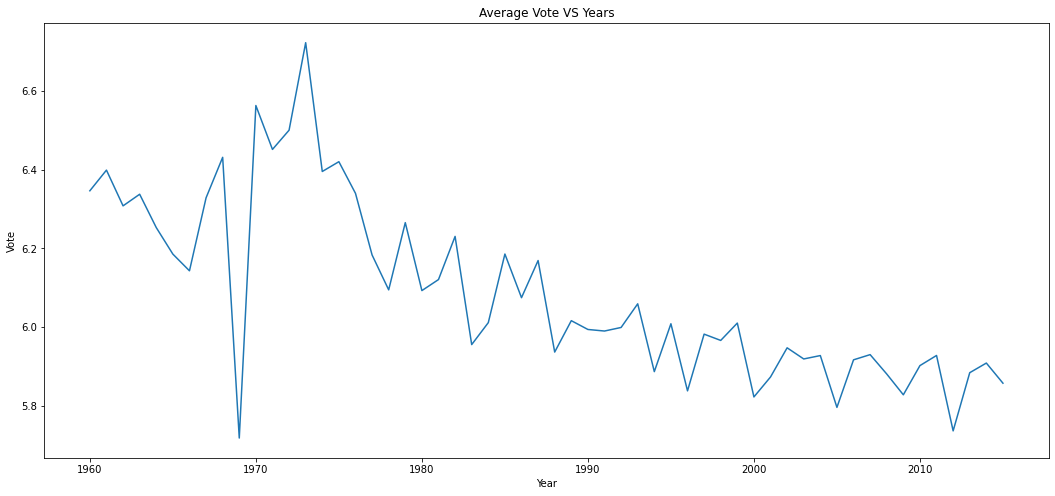

In [24]:
rate_by_year = df.groupby("release_year")["vote_average"].mean()
rate_by_year.plot( kind='line',title='Average Vote VS Years',figsize=(18,8) )
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Vote')

> The graph above shows that the rating of movies over the year fluctuate

### Research Question 3 (budget/revenue of movies accross the years)

In [25]:
revenue_year = df.groupby('release_year')['revenue'].mean().sort_index()

Text(0, 0.5, 'Revenue')

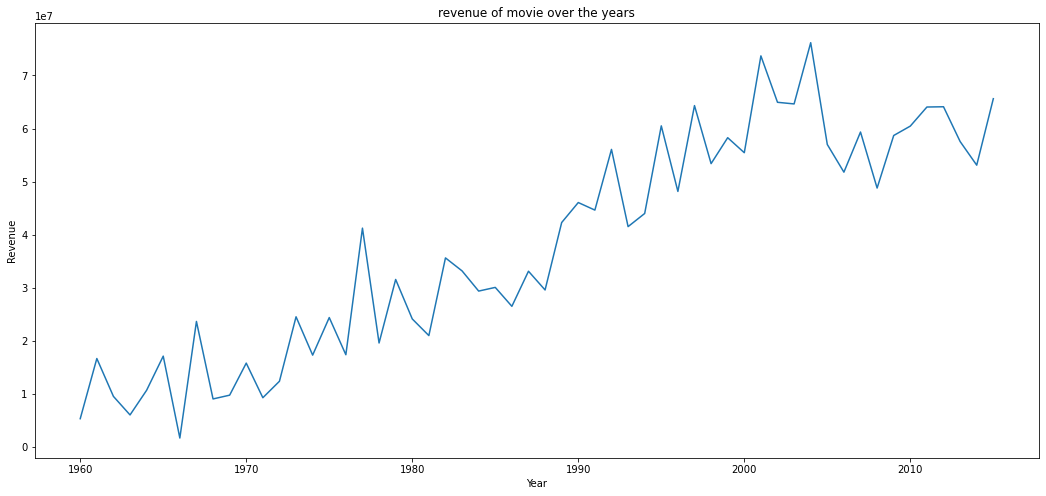

In [26]:
revenue_year.plot(title='revenue of movie over the years',figsize=(18,8) )
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Revenue')

> There was an increase of revenue over the years

In [27]:
Budget_year = df.groupby('release_year')['budget'].mean().sort_index()

Text(0, 0.5, 'Budget')

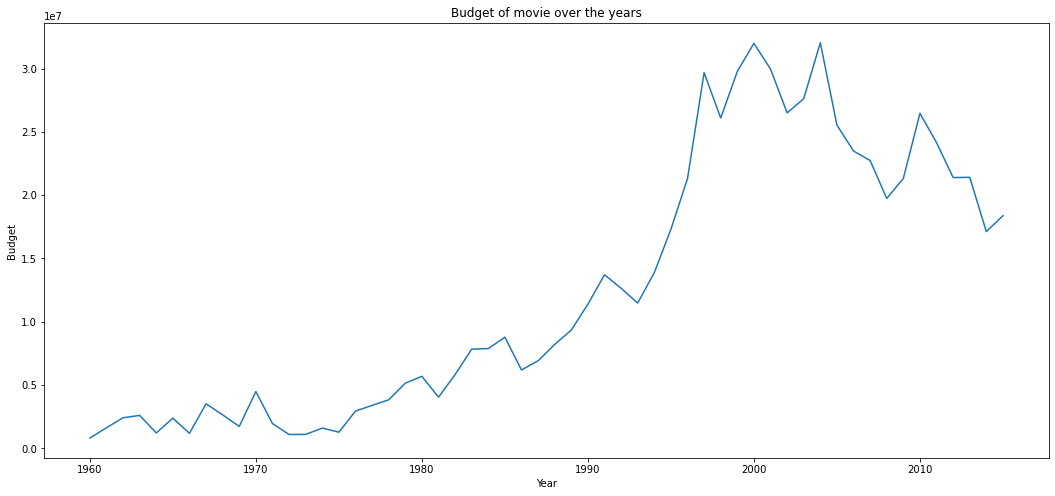

In [28]:
Budget_year.plot(title='Budget of movie over the years',figsize=(18,8) )
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Budget')

> There was an increase of Budget over the years




### Research Question 4 (Year with highest production of movie?)

In [29]:
movies_in_year = df["release_year"].value_counts().sort_index()

Text(0, 0.5, 'Year')

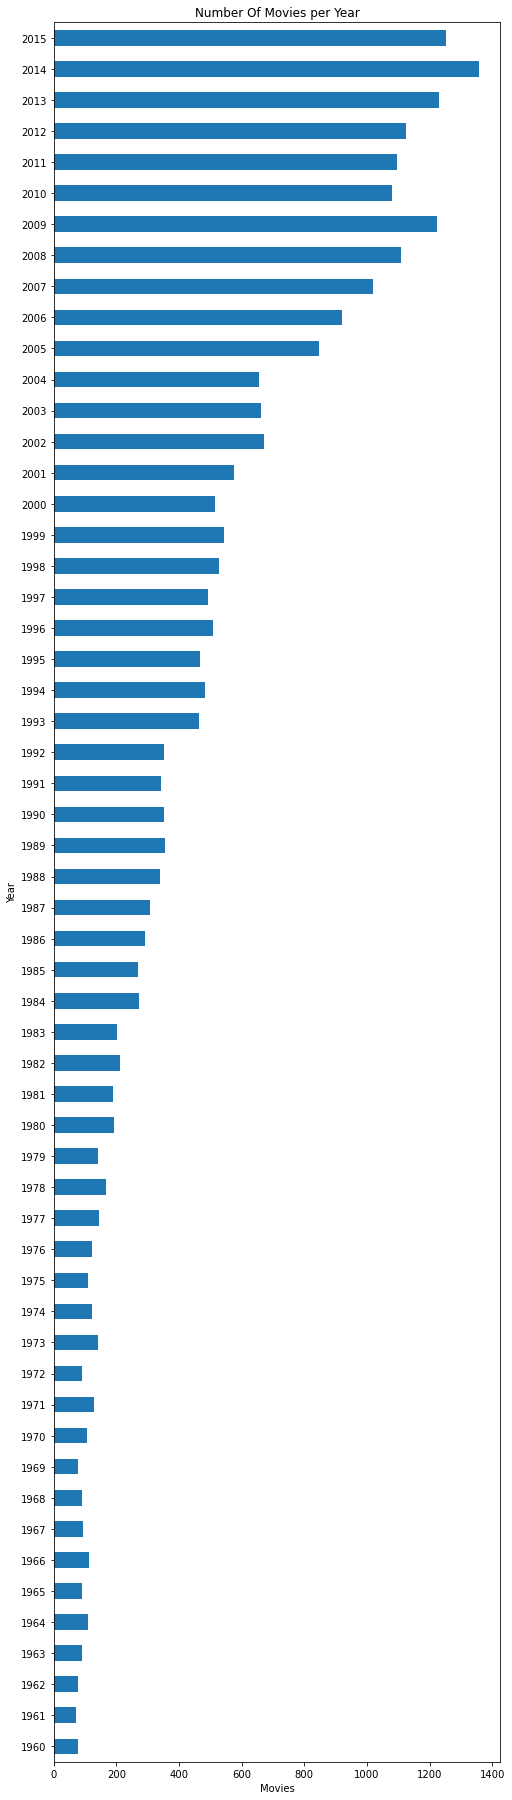

In [30]:
# plot relationship between release_year and number of movies
movies_in_year.plot(kind='barh',title='Number Of Movies per Year',figsize=(8, 32) )
plt.xlabel('Movies')
plt.ylabel('Year')

> the chart over shows clearly that 2014 was the year most movies was relaesed based on the dataset

### Research Question 5 (Director with the highest rating?)

In [31]:
df=df.assign(director=df.director.str.split('|')).explode('director')

In [32]:
director_vote = df.groupby('director').mean().vote_average


In [33]:
director_vote

director
 FrÃ©dÃ©ric Jardin    5.9
A. Todd Smith         5.4
Aaron Blaise          6.8
Aaron Hann            6.1
Aaron Harvey          4.9
                     ... 
Ã‡aÄŸan Irmak         8.2
Ã‰mile Gaudreault     5.2
Ã‰ric Besnard         5.1
Ã‰tienne Chatiliez    6.7
Ã€lex Pastor          5.7
Name: vote_average, Length: 4758, dtype: float64

In [34]:
sort_dir = director_vote.sort_values(ascending=False)
sort_dir.head()


director
David Mallet              8.7
Michael Henry Wilson      8.5
Curt Morgan               8.5
Saul Swimmer              8.5
Jorge RamÃ­rez SuÃ¡rez    8.4
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'Frist 5 directors with high Rating')

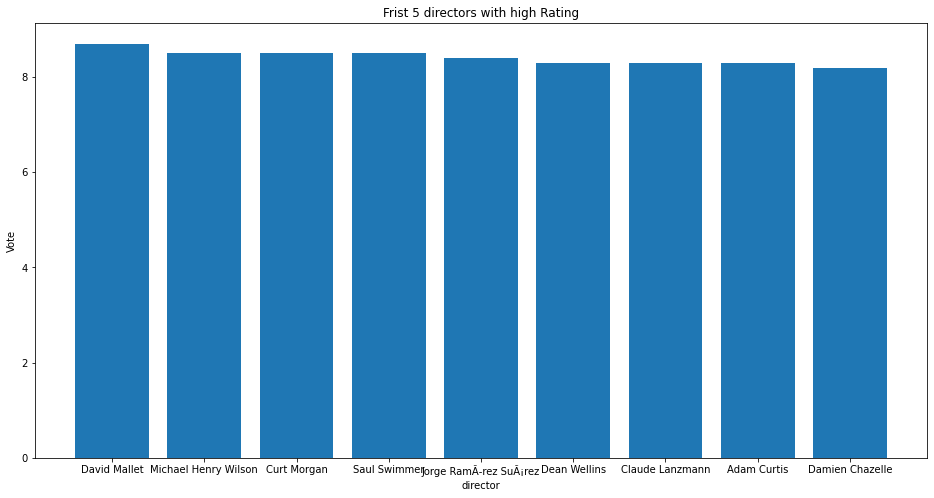

In [35]:
plt.subplots(figsize=(16,8))
plt.bar(sort_dir.index[:9],sort_dir[:9])
# x-axis name
plt.xlabel('director')
# y-axis name 
plt.ylabel('Vote')
# histogram name
plt.title('Frist 5 directors with high Rating')

> David Mallet is the director whose movie have the highest voting

### Research Question 6 (Which genre has the highest number of movies ?)

In [36]:
# Definding a function to separate the data in genres column and count the number of movies in each gener 
def spt_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

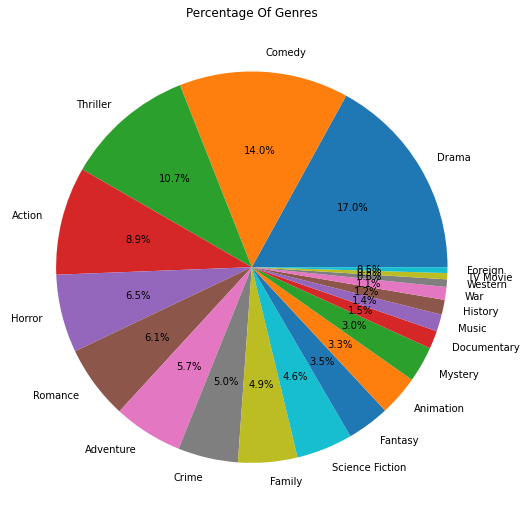

In [37]:
# Plot pie relationship between genre and number of movies
spt_count("genres").plot(kind="pie",figsize=(9,9),autopct="%1.1f%%")
# the title of the plot
plt.title('Percentage Of Genres')
plt.ylabel('');


>The genre who has the highest number of movies is **Drama** by **17%**.<br>
Next after drama is **comdey** by **14%**

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

#### Question 1 : Which genere are most popular and with high rating
>From the Pie chart plotted ADVENTURE genere has the highest popularity while DOCUMANTARY
#### Question 2 : Movies Rating over the years
>The line graph plotted shows that rating decreased acrossed the year
#### Question 3 : Budget/ revenue of movies across the year
> Both Revenue and budet both increased across the year from the readings of the line graph
#### Question 4 : Year with the highest production of movie
>2014 has the longest bar from the barchart
#### Question 5 : Director with the highest rating
>David Mallet
#### Quetion 6: Which genre has the highest number of movies 
>Drama

### Final Conclusions
>Most popular genre is Adventure<br>
>From rating the movies are getting worse over time.<br>
>The film industry is a profit industry over time because the revenue increase across the year.<br>
>2014 was the year where most movies were produced<br>
>Genre with highest number of movies is drama.<br>

### Limitations:
>Data with missing values has an impact on the outcomes.<br>
>budget and revenue have alot of zeros values and had to delete alot of rows which is not ideal.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1